In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# randomForest(ML)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# logisticRegression(ML)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# K means (Ml unsupervised)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
df=pd.read_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\encoded_employee_attrition.csv")

# X = all features except the target
X = df.drop('Attrition_Yes', axis=1)

# y = target (what we're predicting)
y = df['Attrition_Yes']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
# randomForest ----->                   
# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Get the importance score for each feature
importances = rf.feature_importances_

# Get the column names
feature_names = X.columns


In [5]:
# Create a table of features and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (highest first)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show the top 10 features
print(importance_df.head(10))

               Feature  Importance
9        MonthlyIncome    0.079447
43        OverTime_Yes    0.058897
0                  Age    0.056085
1            DailyRate    0.051504
10         MonthlyRate    0.048895
16   TotalWorkingYears    0.048578
2     DistanceFromHome    0.042809
5           HourlyRate    0.041754
19      YearsAtCompany    0.041551
11  NumCompaniesWorked    0.037947


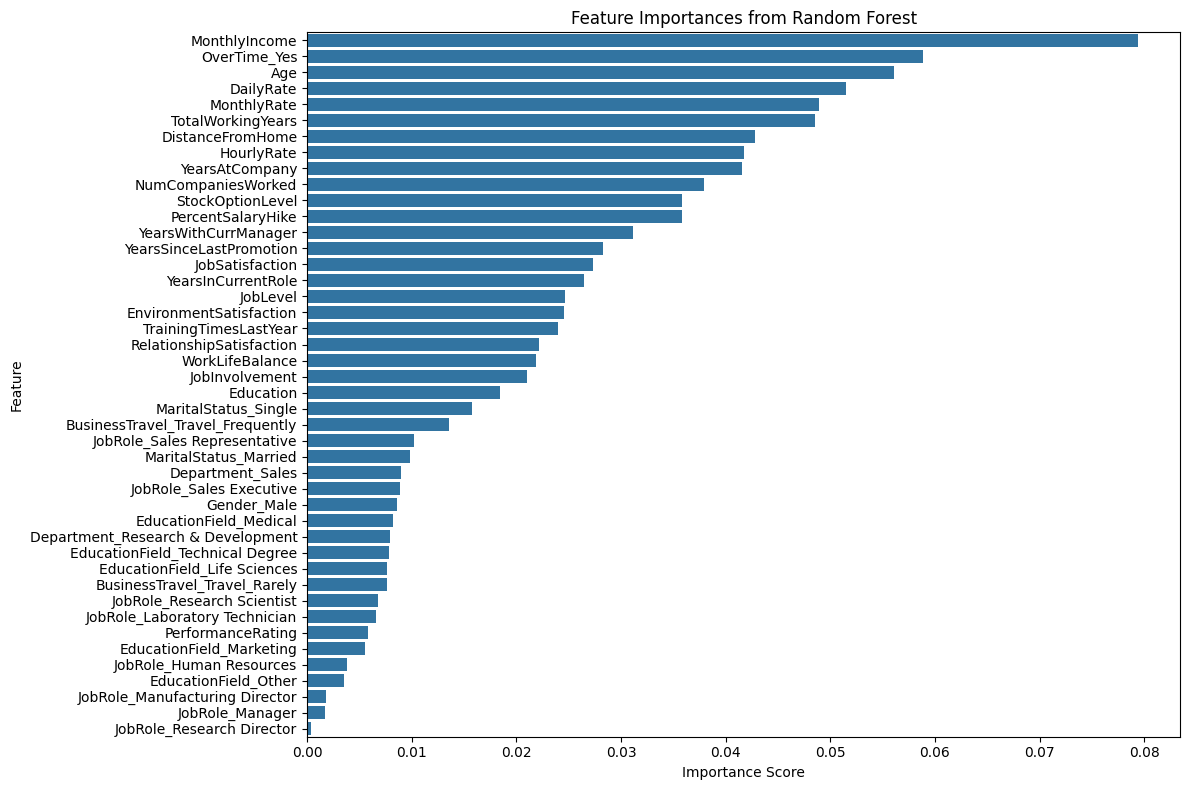

In [6]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [7]:
# Let's say you keep features with importance > 0.02
top_features = importance_df[importance_df['Importance'] > 0.02]['Feature'].tolist()

# Reduce your data to only those features
X_top = df[top_features]


In [ ]:
# LogisticRegrssion ------>

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [9]:
y_pred = logreg.predict(X_test)


In [10]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8605442176870748
Confusion Matrix:
 [[248   7]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.42      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.65      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [11]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Odds Ratio': np.exp(logreg.coef_[0])
})
coefficients = coefficients.sort_values(by='Odds Ratio', ascending=False)
print(coefficients)


                              Feature  Coefficient  Odds Ratio
43                       OverTime_Yes     0.432323    1.540833
42               MaritalStatus_Single     0.259420    1.296178
21            YearsSinceLastPromotion     0.202607    1.224591
11                 NumCompaniesWorked     0.190478    1.209828
23   BusinessTravel_Travel_Frequently     0.153942    1.166423
19                     YearsAtCompany     0.150863    1.162837
26                   Department_Sales     0.145962    1.157152
40       JobRole_Sales Representative     0.095507    1.100216
32                        Gender_Male     0.066033    1.068262
34      JobRole_Laboratory Technician     0.065187    1.067358
3                           Education     0.064159    1.066262
31    EducationField_Technical Degree     0.060435    1.062299
28           EducationField_Marketing     0.059077    1.060856
13                  PerformanceRating     0.058120    1.059842
2                    DistanceFromHome     0.054136    1

In [ ]:
  #Kmeans------->


scaler = StandardScaler()   # create an object
X_scaled = scaler.fit_transform(X)  # Use same X used in other models (excluding y)

In [17]:


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Save cluster labels
cluster_labels = kmeans.labels_


In [18]:
df['Cluster'] = cluster_labels


In [19]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


               Age   DailyRate  DistanceFromHome  Education  \
Cluster                                                       
0        34.158140  803.169767          9.070930   2.798837   
1        40.822951  801.521311          9.363934   3.073770   

         EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Cluster                                                                  
0                       2.733721   65.950000        2.736047  1.426744   
1                       2.704918   65.808197        2.721311  2.962295   

         JobSatisfaction  MonthlyIncome  ...  JobRole_Laboratory Technician  \
Cluster                                  ...                                  
0               2.731395    3899.202326  ...                       0.293023   
1               2.724590   10173.762295  ...                       0.011475   

         JobRole_Manager  JobRole_Manufacturing Director  \
Cluster                                                    
0            

In [21]:
print(df['Cluster'].value_counts())
print(df.groupby('Cluster')['Attrition_Yes'].mean())  # % attrition per cluster


Cluster
0    860
1    610
Name: count, dtype: int64
Cluster
0    0.191860
1    0.118033
Name: Attrition_Yes, dtype: float64


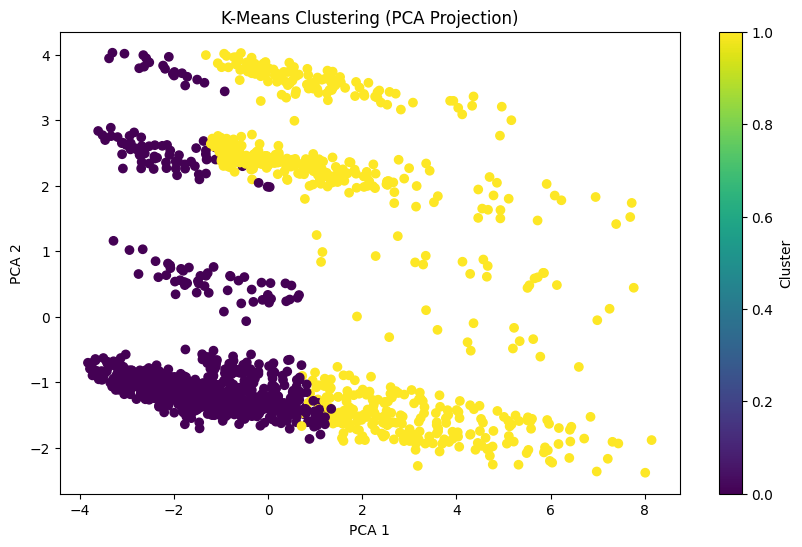

In [25]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()
